In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, idx):
    return [row[idx] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [19]:
X,y = prepare_data('advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


In [11]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

In [12]:
y = predict(1, 1, 1, 0, 0.5, 0, 0.5)
print(y)

1.0


In [13]:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [14]:
g_wi = compute_gradient_wi(1, 1, 0.5)
print(g_wi)

-1.0


In [15]:
g_b = compute_gradient_b(2, 0.5)
print(g_b)

-3.0


In [16]:
after_wi = update_weight_wi(1, -0.5, 1e-5)
print(after_wi)

1.000005


In [17]:
after_b = update_weight_b(0.5, -1, 1e-5)
print(after_b)

0.50001


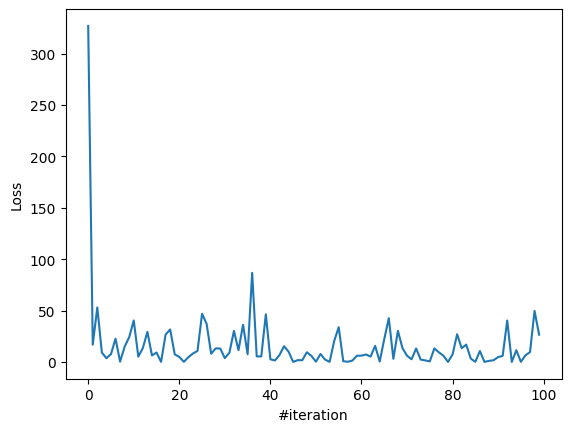

In [20]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [21]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [22]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(sales)

8.176413319549823


In [23]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db

def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

In [24]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


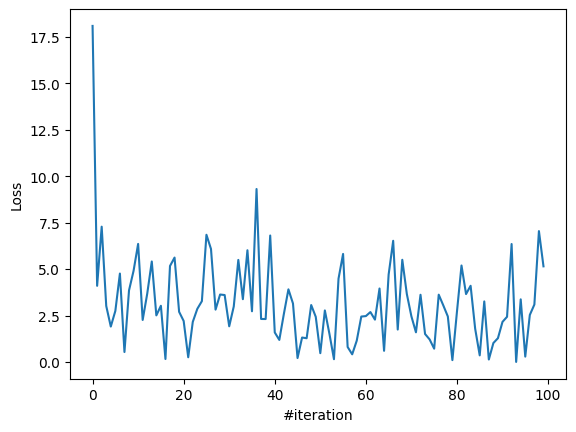

In [25]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [26]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
        
        # (after processing N samples) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # logging
        losses.append(loss_total/N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

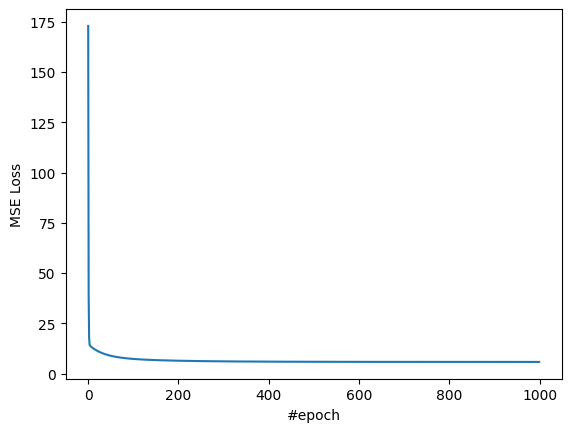

In [27]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel('#epoch')
plt.ylabel('MSE Loss')
plt.show()

In [28]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [29]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = [[1, x1, x2, x3] for x1, x2, x3, in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [30]:
def initialize_params():
    # w1 = random.gauss(mu=0.0, sigma=0.01)
    # w2 = random.gauss(mu=0.0, sigma=0.01)
    # w3 = random.gauss(mu=0.0, sigma=0.01)
    # b = 0
    b, w1, w2, w3 = [0, -0.01268850433497871, 0.004752496982185252,  0.0073796171538643845]
    return b, w1, w2, w3

def predict(X_features, weights):
    return sum([xi*wi for xi, wi in zip(X_features, weights)])

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_w(X_features, y , y_hat):
    return [2*xi*(y_hat - y) for xi in X_features]

def update_weight(weights, dl_dweights, lr):
    return [wi - lr*dwi for wi, dwi in zip(weights, dl_dweights)]

def implement_linear_regression(X_feature, y_ouput, epoch_max = 50, lr = 1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_ouput)

    for epoch in range(epoch_max):
        print('epoch', epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_ouput[i]

            # compute output
            y_hat = predict(features_i, weights)

            # compute loss
            loss = compute_loss(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # update parameters
            weights = update_weight(weights, dl_dweights, lr)

            # logging
            losses.append(loss)
    return weights, losses

In [31]:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
print(L[9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


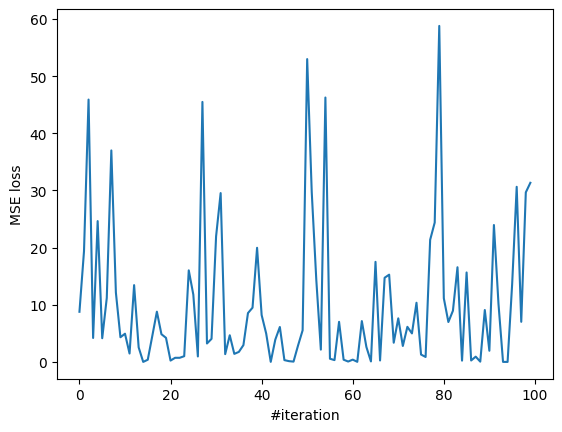

In [32]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, idx):
    return [row[idx] for row in data]

def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    data1 = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]
    data2 = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]
    data3 = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]
    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3)

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # scale data (only for features)
    # remember to scale input features in inference, therefore, we need to save max, min values
    (tv_data, radio_data, newspaper_data) ,(max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_scaling(tv_data, radio_data, newspaper_data)
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y


In [34]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [0, 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]
    # return [bias, w1, w2, w3] 


def predict(X_features, weights):
    return sum([f*w for f, w in zip(X_features, weights)])

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat-y) for xi in X_features] 
    return dl_dweights 

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)] 
    return weights    

def implement_linear_regression(X_feature, y_ouput, epoch_max=50, lr=0.01):

  losses = []
  weights = initialize_params()
  N = len(y_ouput)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i     
          features_i = X_feature[i]
          y = y_ouput[i]
          
          # compute output 
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss) 
  return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


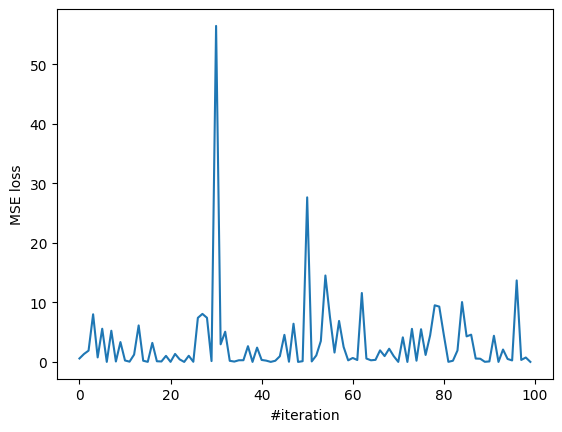

In [35]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()